# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.327742e+01     1.501522e+01
 * time: 0.004221200942993164
     1     6.201637e+01     1.080279e+01
 * time: 0.012579202651977539
     2     5.456873e+01     1.593138e+01
 * time: 0.03191804885864258
     3     3.918380e+01     1.187459e+01
 * time: 0.15282511711120605
     4     2.829573e+01     9.878490e+00
 * time: 0.18031907081604004
     5     2.164564e+01     7.706001e+00
 * time: 0.20409321784973145
     6     2.053712e+01     8.135097e+00
 * time: 0.22362899780273438
     7     9.957581e+00     2.808390e+00
 * time: 0.24326205253601074
     8     7.206266e+00     3.008758e+00
 * time: 0.26354002952575684
     9     6.499089e+00     1.466743e+00
 * time: 0.2824392318725586
    10     6.271361e+00     1.296511e+00
 * time: 0.35275721549987793
    11     6.141833e+00     8.431072e-01
 * time: 0.3679311275482178
    12     6.065884e+00     8.455559e-01
 * time: 0.3834969997406006
    13     6.012942e+00     1.030194e+00
 * time: 

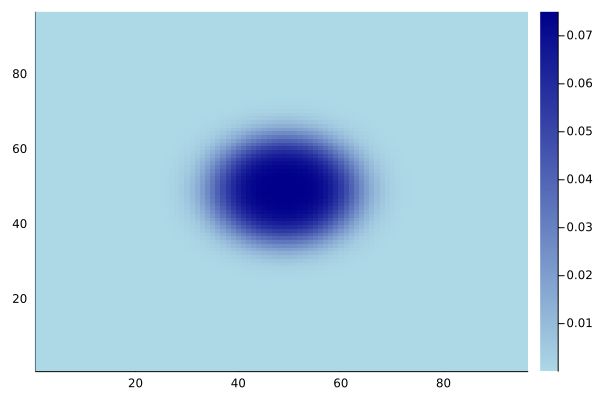

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))